HEART DISEASE KNN CLASSIFICATION MODEL 

INTRODUCTION

According to the World Health Organization (WHO), cardiovascular disease is the leading cause of death globally. In fact, over 17.9 million patients die from the disease each year and over 229 billion dollars are spent on cardiovascular medical care in the USA alone each year. Heart disease is characterized by high blood pressure, cholesterol and obestity and leads to symptoms such as heart failure, arrhythmia and heart attack. (SOURCE?)

Machine learning algorithms have vast clinical relevance because it takes a set of data inputs and learns to predict output values from it, for example diagnoses. Hence, our goal is to create and train a heart disease prediction classification model that can be used to predict whether individuals have heart disease based on various clinical attributes using the KNN classification algorithm.

Research question: Which individuls are likely to have heart disease according to various clinical attributes?

PRELIMINARY DATA ANALYSIS

The "hungarian heart disease" data set obtained from the machine learning repository contains 294 observations that represent diagnosed patients and 14 columns which detail various clinical attributes of heart disease as well as whether or not the patient was diagnosed with heart disease on a scale of 0 to 4.

We began by loading in the data set. Since it does not have column names, we renamed them to be the variable names. 

*do we need to narrate our work like this? 

In [2]:
library(tidyverse)
library(tidymodels)
set.seed(123)

untidy_heart_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names = FALSE)

untidy_heart_data_2 <- rename(untidy_heart_data, 
                        age = X1, 
                        sex = X2, 
                        chest_pain_type= X3, 
                        resting_blood_pressure = X4, 
                        serum_cholestoral = X5, 
                        fasting_blood_sugar = X6, 
                        resting_electrocardiographic_results = X7, 
                        max_heart_rate = X8, 
                        exercise_induced_angina = X9, 
                        oldpeak = X10, 
                        slope = X11, 
                        number_vessels = X12, 
                        thal = X13, 
                        diagnosis = X14)            

untidy_heart_data_3 <- untidy_heart_data_2|>
    mutate(across(c(diagnosis, sex, chest_pain_type, fasting_blood_sugar, resting_electrocardiographic_results,exercise_induced_angina), as.factor))|>
    mutate(across(c(resting_blood_pressure), as.numeric))
  untidy_heart_data_3   


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate,exercise_induced_angina,oldpeak,slope,number_vessels,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<chr>,<fct>,<fct>,<chr>,<fct>,<dbl>,<chr>,<chr>,<chr>,<fct>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0
32,1,2,110,225,0,0,184,0,0,?,?,?,0
32,1,2,125,254,0,0,155,0,0,?,?,?,0
33,1,3,120,298,0,0,185,0,0,?,?,?,0


We can create a new data frame with only the predictor variables that we want to use in our model because they are good clinical indicators of heart disease, have little missing data and have numeric data instead of categorical data. 

In [3]:
tidy_heart_data <- untidy_heart_data_3  |>
    select(age, resting_blood_pressure, serum_cholestoral, max_heart_rate)
tidy_heart_data

age,resting_blood_pressure,serum_cholestoral,max_heart_rate
<dbl>,<dbl>,<chr>,<chr>
28,130,132,185
29,120,243,160
29,140,?,170
30,170,237,170
31,100,219,150
32,105,198,165
32,110,225,184
32,125,254,155
33,120,298,185


Since the data is already in tidy format and the variables are the correct data type, we can now divide our heart disease data set into a training set and a testing set using set.seed for a random yet reproducible split. 

In [4]:
split_heart_data <- initial_split(untidy_heart_data_2, prop = 0.75, strata = diagnosis)
training_heart_data <- training(split_heart_data)
testing_heart_data <- testing(split_heart_data)
glimpse(training_heart_data) 
glimpse(testing_heart_data)

Rows: 220
Columns: 14
$ age                                  <dbl> 28, 30, 31, 32, 32, 32, 33, 34, 3…
$ sex                                  <dbl> 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, …
$ chest_pain_type                      <dbl> 2, 1, 2, 2, 2, 2, 3, 2, 1, 4, 2, …
$ resting_blood_pressure               <chr> "130", "170", "100", "105", "110"…
$ serum_cholestoral                    <chr> "132", "237", "219", "198", "225"…
$ fasting_blood_sugar                  <chr> "0", "0", "0", "0", "0", "0", "0"…
$ resting_electrocardiographic_results <chr> "2", "1", "1", "0", "0", "0", "0"…
$ max_heart_rate                       <chr> "185", "170", "150", "165", "184"…
$ exercise_induced_angina              <chr> "0", "0", "0", "0", "0", "0", "0"…
$ oldpeak                              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ slope                                <chr> "?", "?", "?", "?", "?", "?", "?"…
$ number_vessels                       <chr> "?", "?", "?", "?", "?", "?", "?"…
$ thal            

We can now use the training data to create a summary table that shows the number and percentage of observations that do and do not have a heart disease diagnosis. As shown, there are 141 observations that do not have heart disease (64.09%) and 79 observations that do have heart disease diagnosis(35.90%). 

In [5]:
summary_heart_data <- training_heart_data|>
    group_by(diagnosis)|>
    summarize(Count=n())|>
    mutate(Percent = Count/220)
summary_heart_data

diagnosis,Count,Percent
<dbl>,<int>,<dbl>
0,141,0.6409091
1,79,0.3590909


We can also create a summary table of the means for potential predictor variables. 

In [6]:
summary_heart_data_2 <- training_heart_data |>
    summarize(mean_age = mean(age, na.rm = TRUE), 
                mean_blood_pressure = mean(resting_blood_pressure, na.rm = TRUE))
summary_heart_data_2

#the data type is double, not sure why its returning NA

Warning message in mean.default(resting_blood_pressure, na.rm = TRUE):
“argument is not numeric or logical: returning NA”


mean_age,mean_blood_pressure
<dbl>,<dbl>
48.23182,NA


We can now plot a graph of age and resting blood pressure as predictor variables and colour them by diagnosis to see the relationship. 

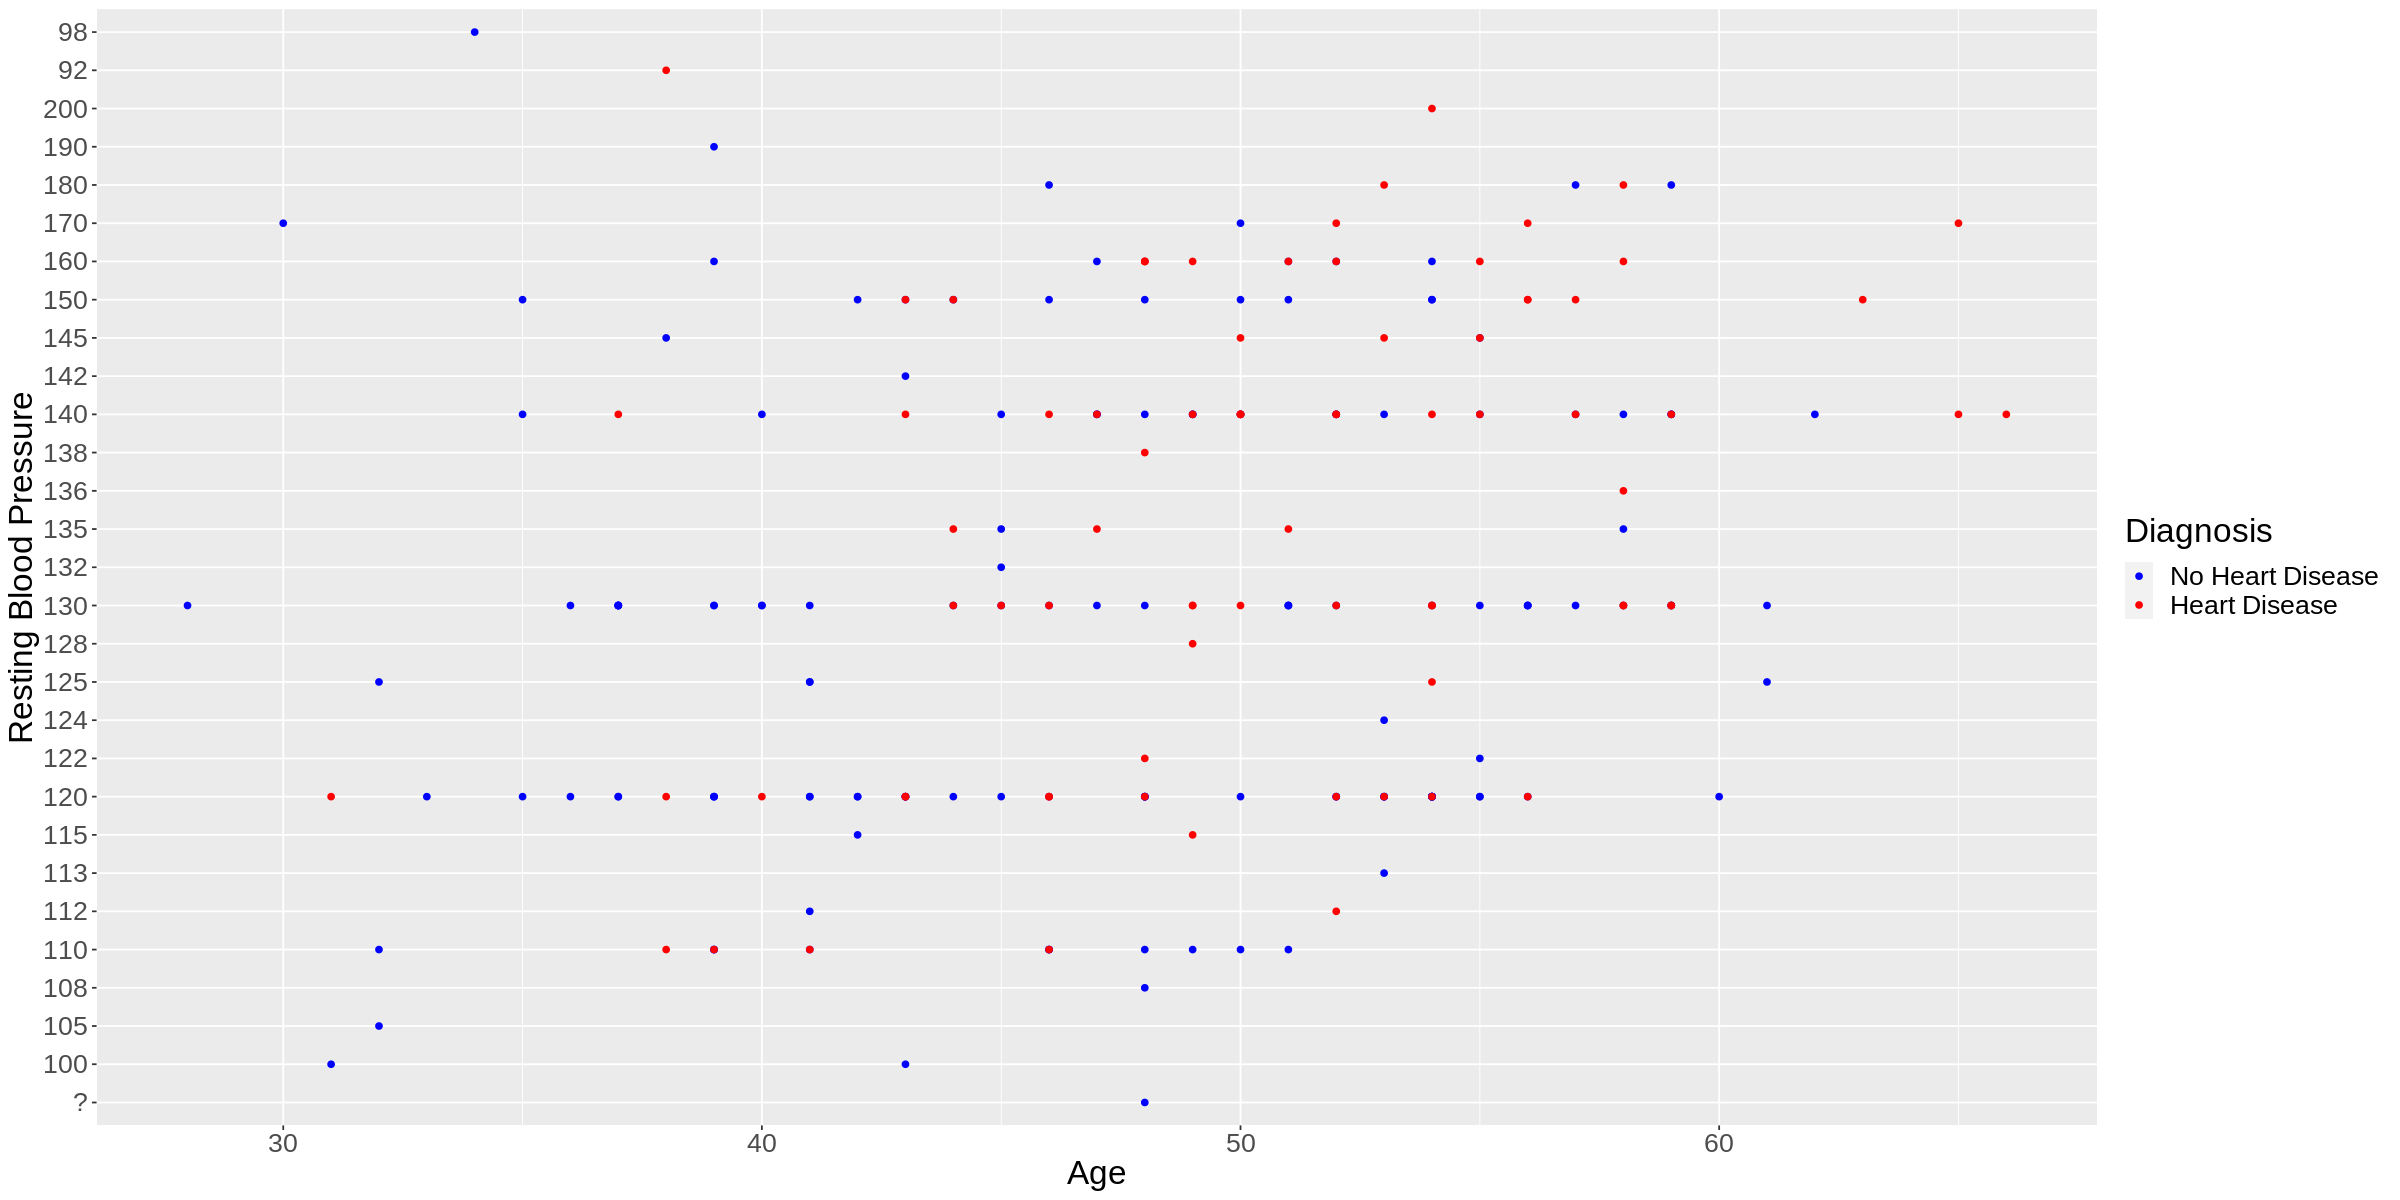

In [7]:
options(repr.plot.width = 20, repr.plot.height = 10)
heart_scatterplot_1 <- training_heart_data |>
    ggplot(aes(x = age, y = resting_blood_pressure, color = as.factor(diagnosis))) +
    geom_point() +
    labs(x = "Age", y = "Resting Blood Pressure", color = "Diagnosis") +
    theme(text = element_text(size = 20)) +
    scale_color_manual(labels = c("No Heart Disease", "Heart Disease"), values = c("blue", "red"))
heart_scatterplot_1

There does not appear to be a relationship between age and resting blood pressure in relation to the diagnosis of heart disease because the data points with class diagnosed and undiagnosed are evenly distributed. 

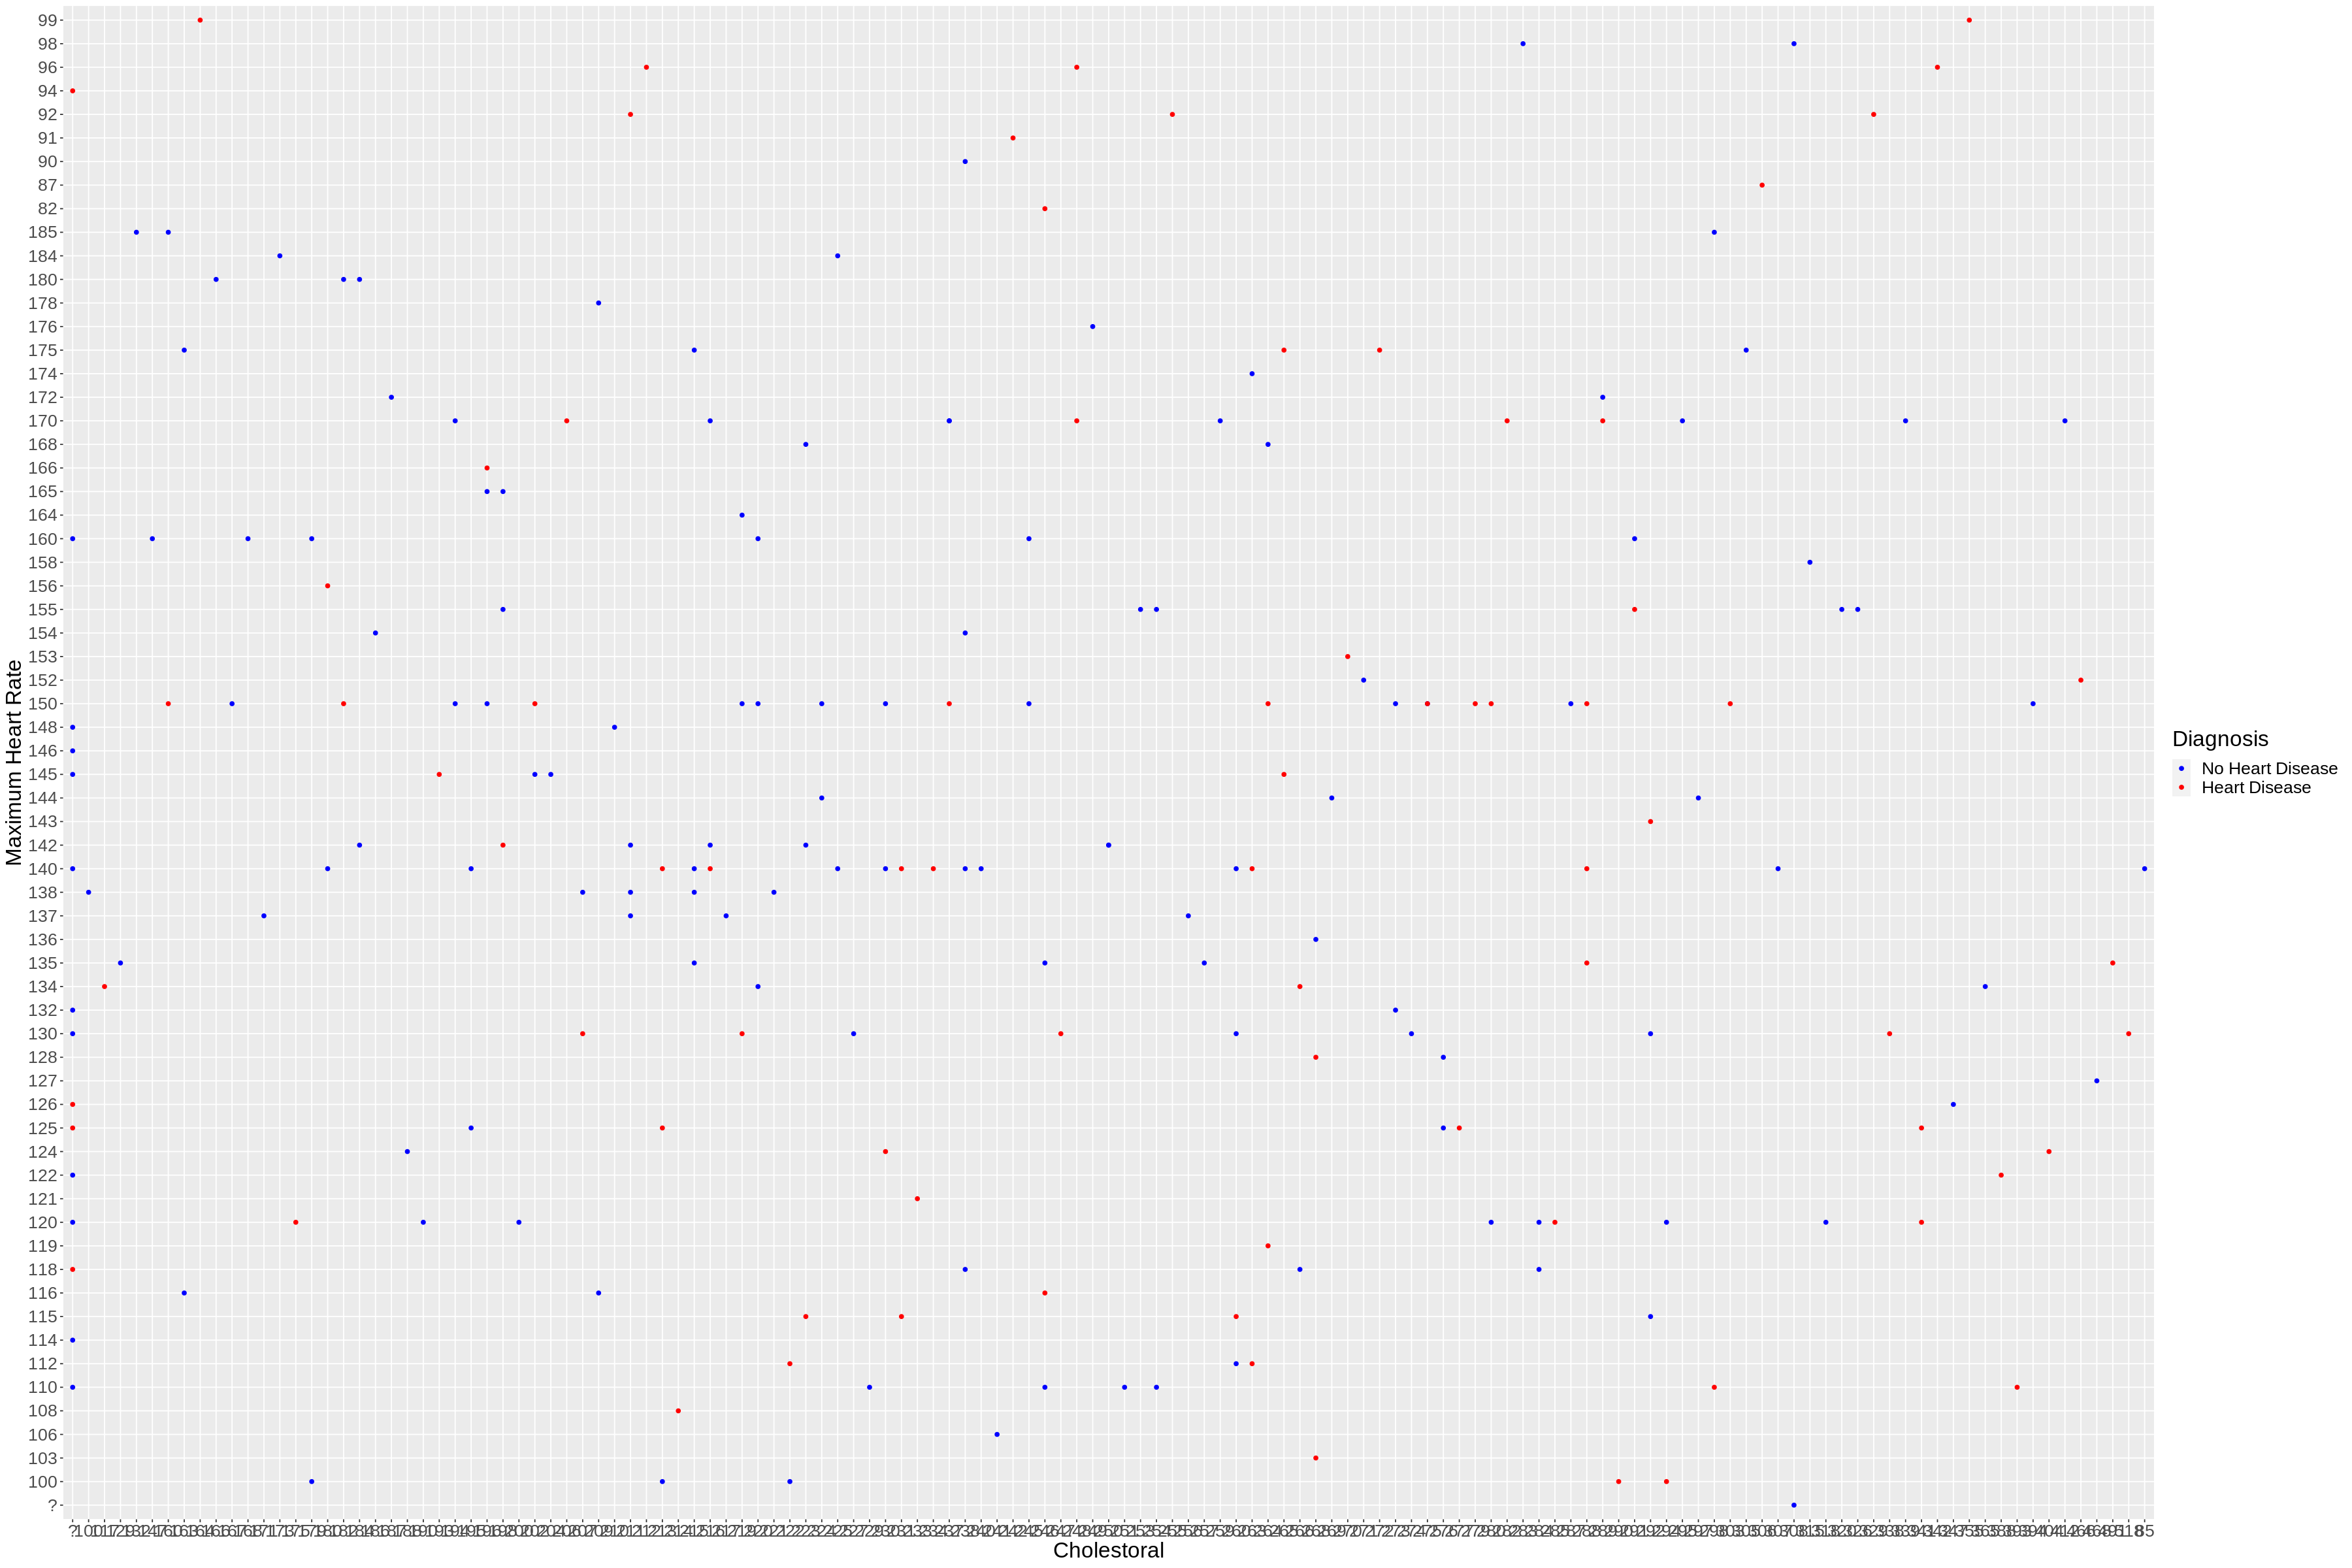

In [20]:
options(repr.plot.width = 30, repr.plot.height = 20)
heart_scatterplot_2 <- training_heart_data |>
    ggplot(aes(x = serum_cholestoral, y = max_heart_rate, color = as.factor(diagnosis))) +
    geom_point() +
    labs(x = "Cholestoral", y = "Maximum Heart Rate", color = "Diagnosis") +
    theme(text = element_text(size = 20)) +
    scale_color_manual(labels = c("No Heart Disease", "Heart Disease"), values = c("blue", "red"))
heart_scatterplot_2

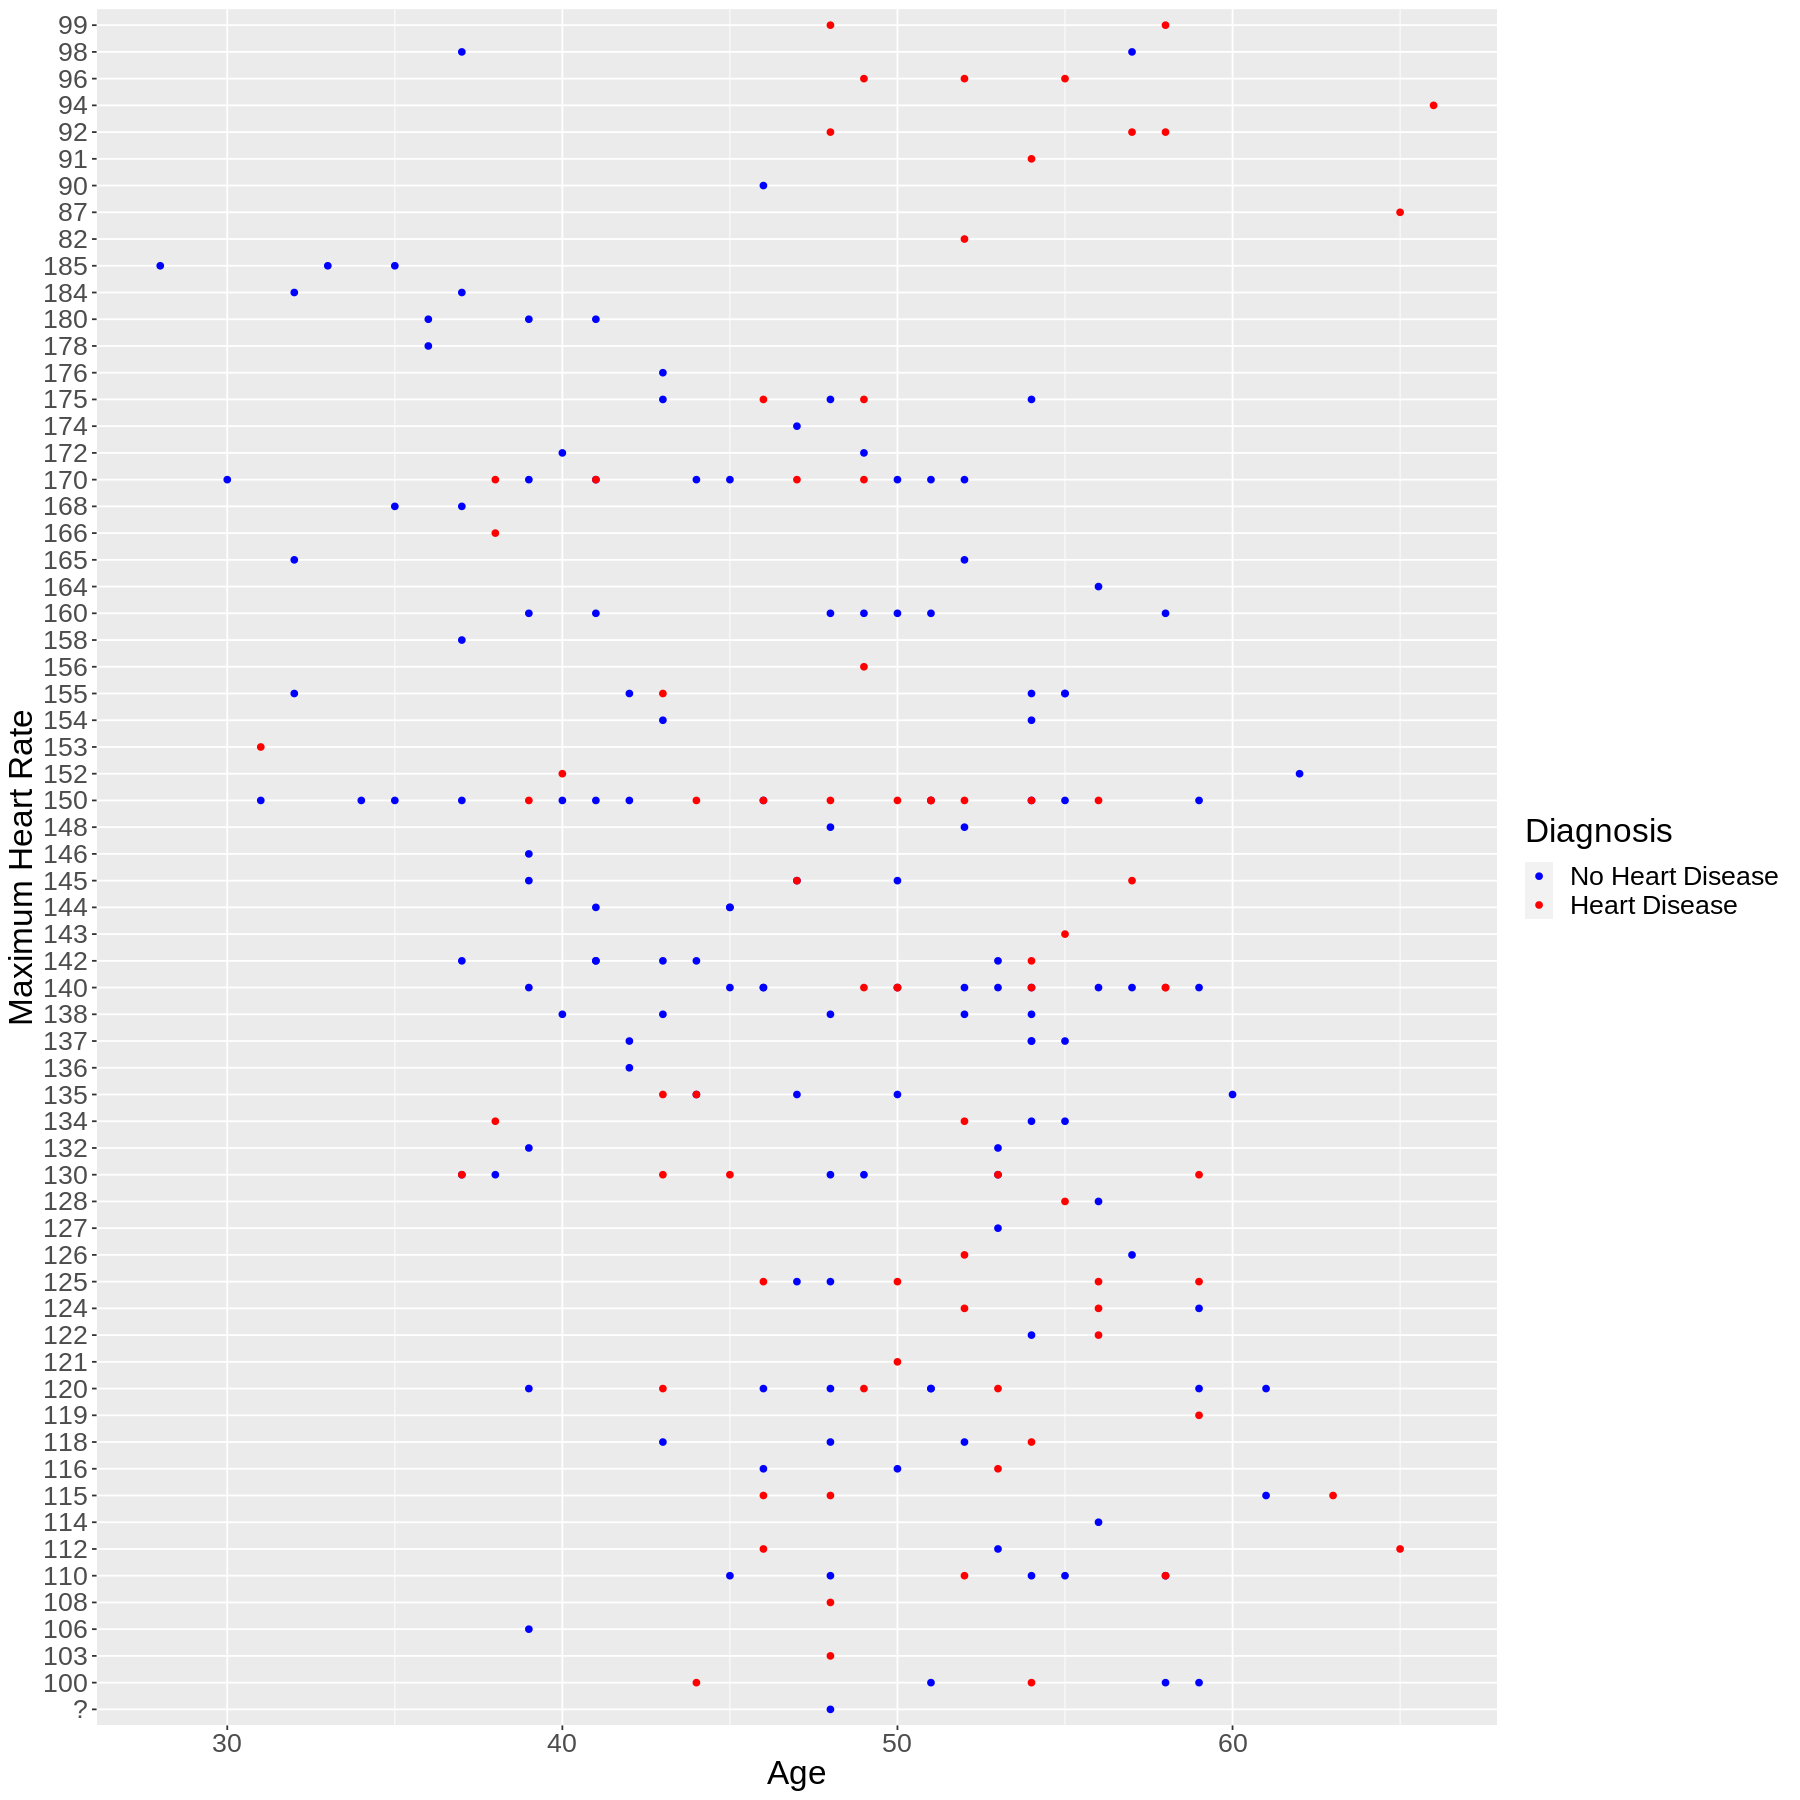

In [19]:
options(repr.plot.width = 15, repr.plot.height = 15)
heart_scatterplot_3 <- training_heart_data |>
    ggplot(aes(x = age, y = max_heart_rate, color = as.factor(diagnosis))) +
    geom_point() +
    labs(x = "Age", y = "Maximum Heart Rate", color = "Diagnosis") +
    theme(text = element_text(size = 20)) +
    scale_color_manual(labels = c("No Heart Disease", "Heart Disease"), values = c("blue", "red"))
heart_scatterplot_3

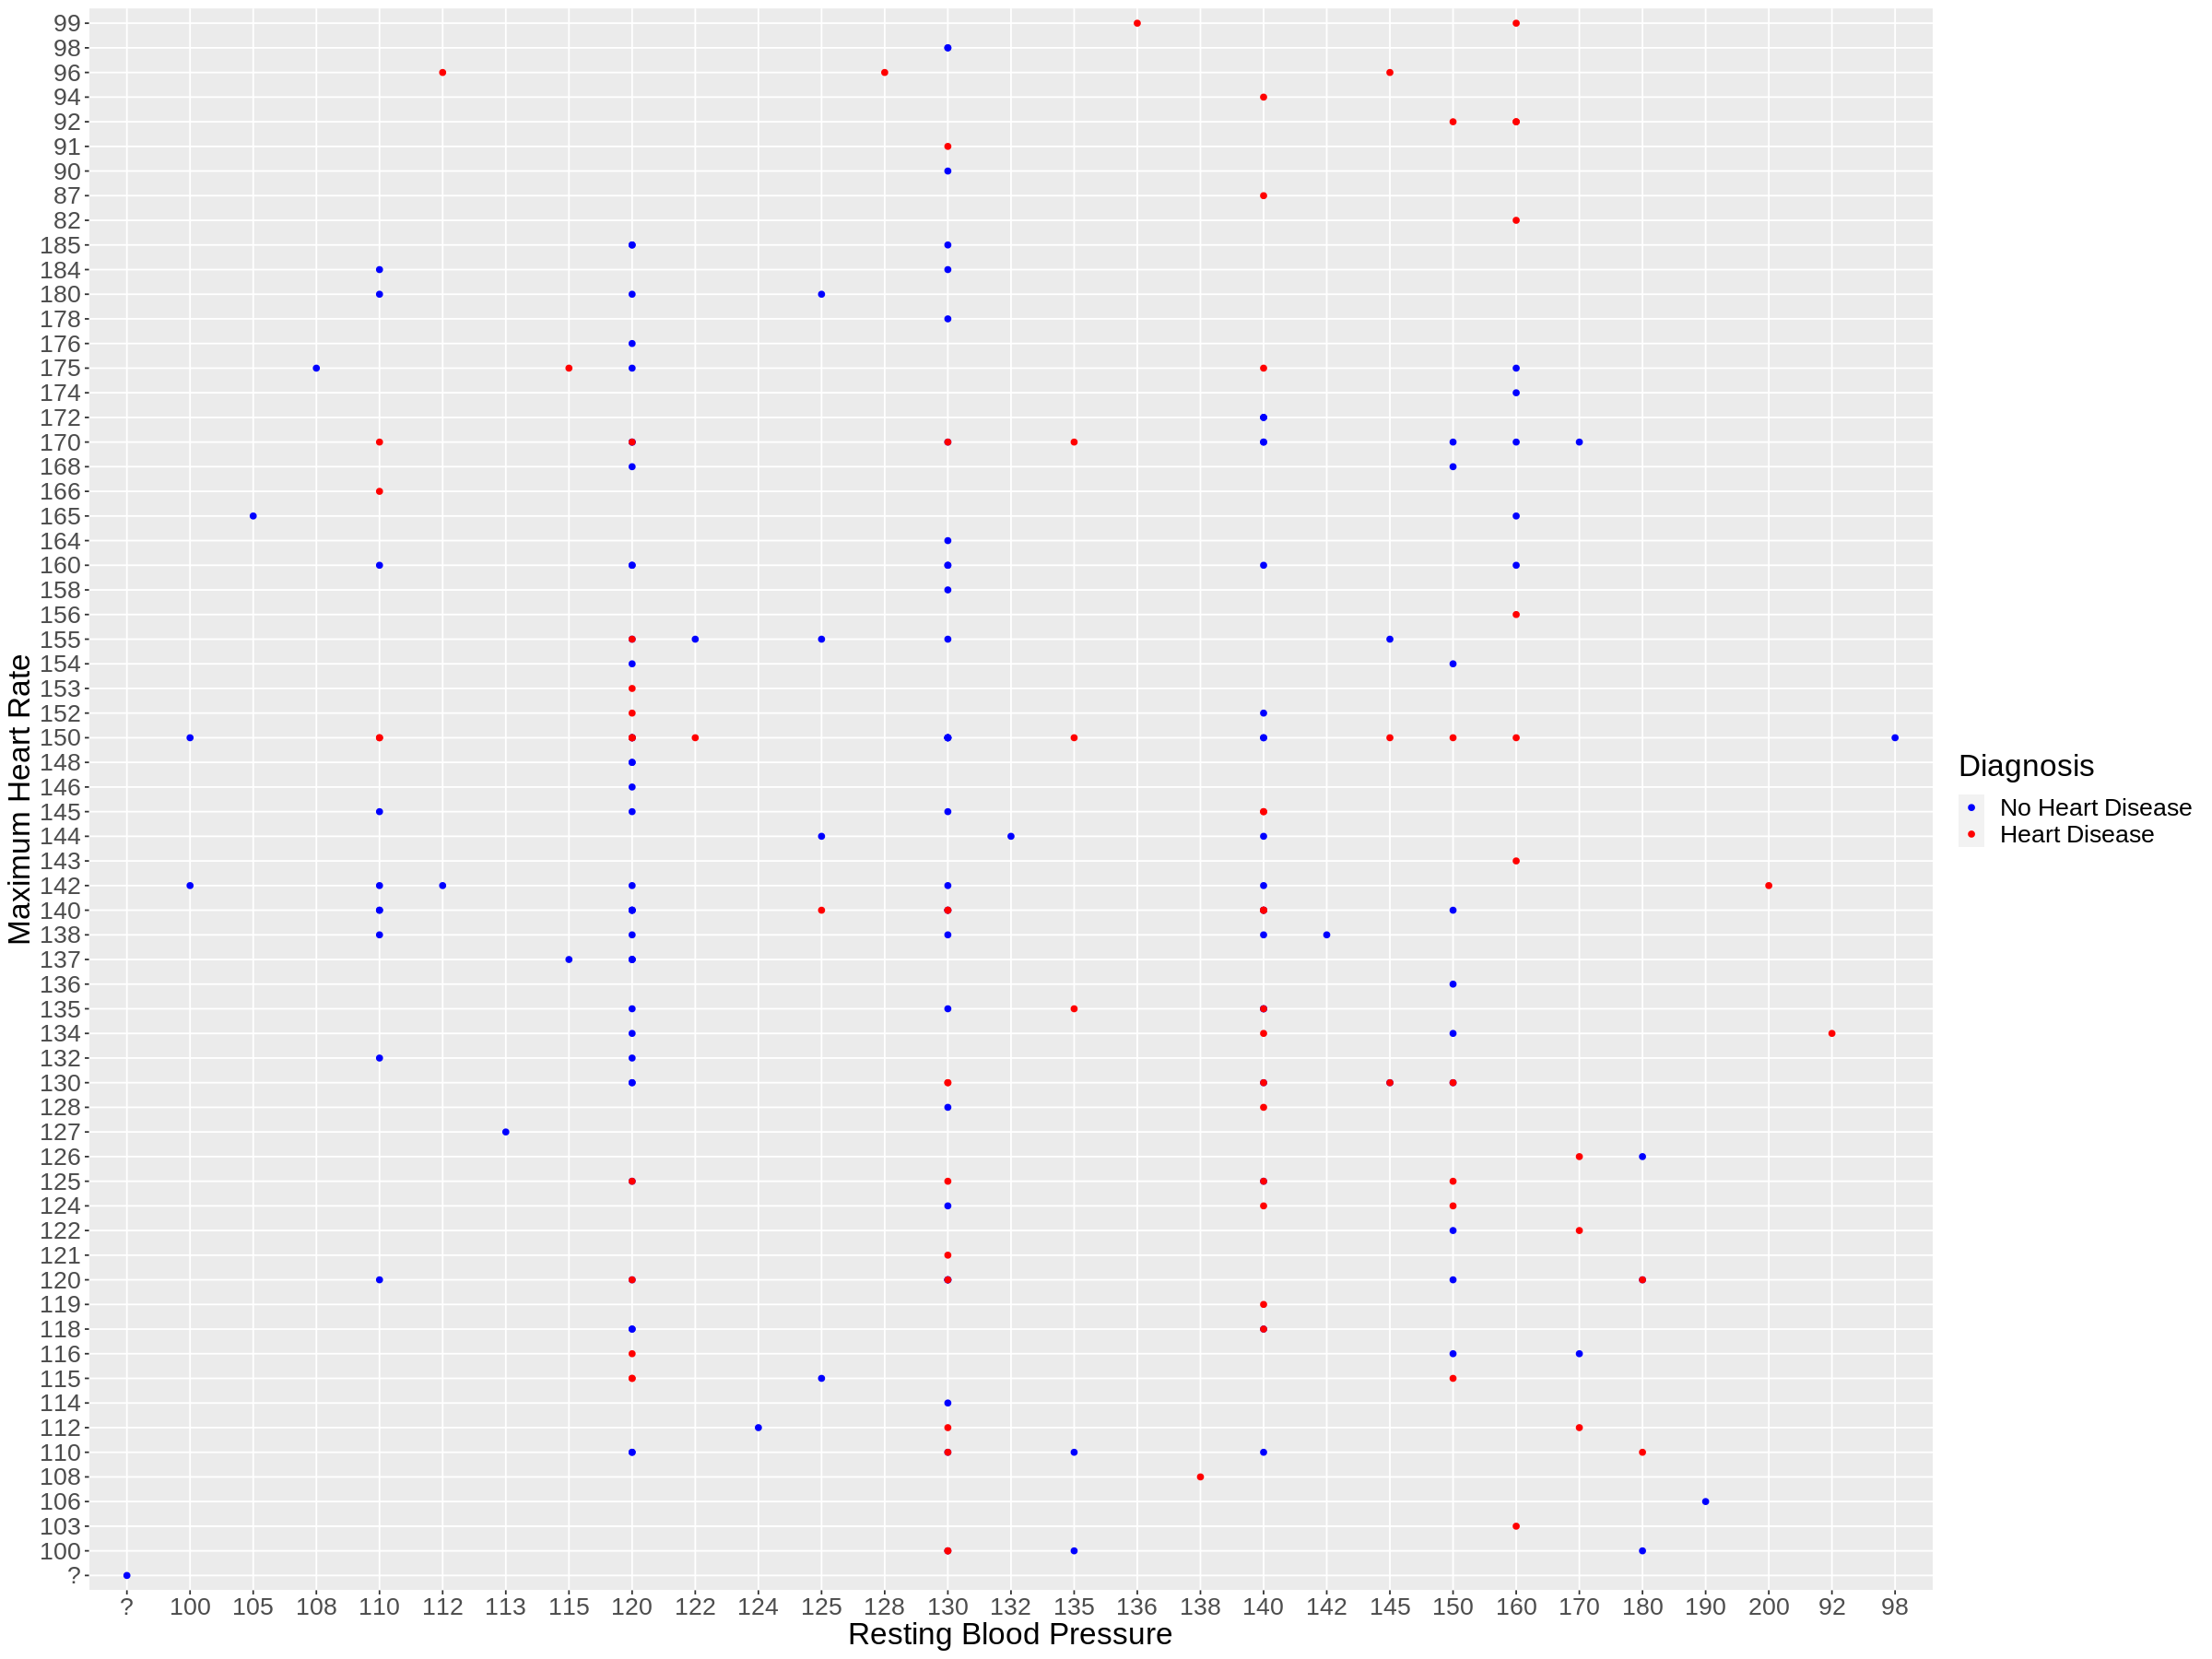

In [22]:
options(repr.plot.width = 20, repr.plot.height = 15)
heart_scatterplot_4 <- training_heart_data |>
    ggplot(aes(x = resting_blood_pressure, y = max_heart_rate, color = as.factor(diagnosis))) +
    geom_point() +
    labs(x = "Resting Blood Pressure", y = "Maximum Heart Rate", color = "Diagnosis") +
    theme(text = element_text(size = 20)) +
    scale_color_manual(labels = c("No Heart Disease", "Heart Disease"), values = c("blue", "red"))
heart_scatterplot_4

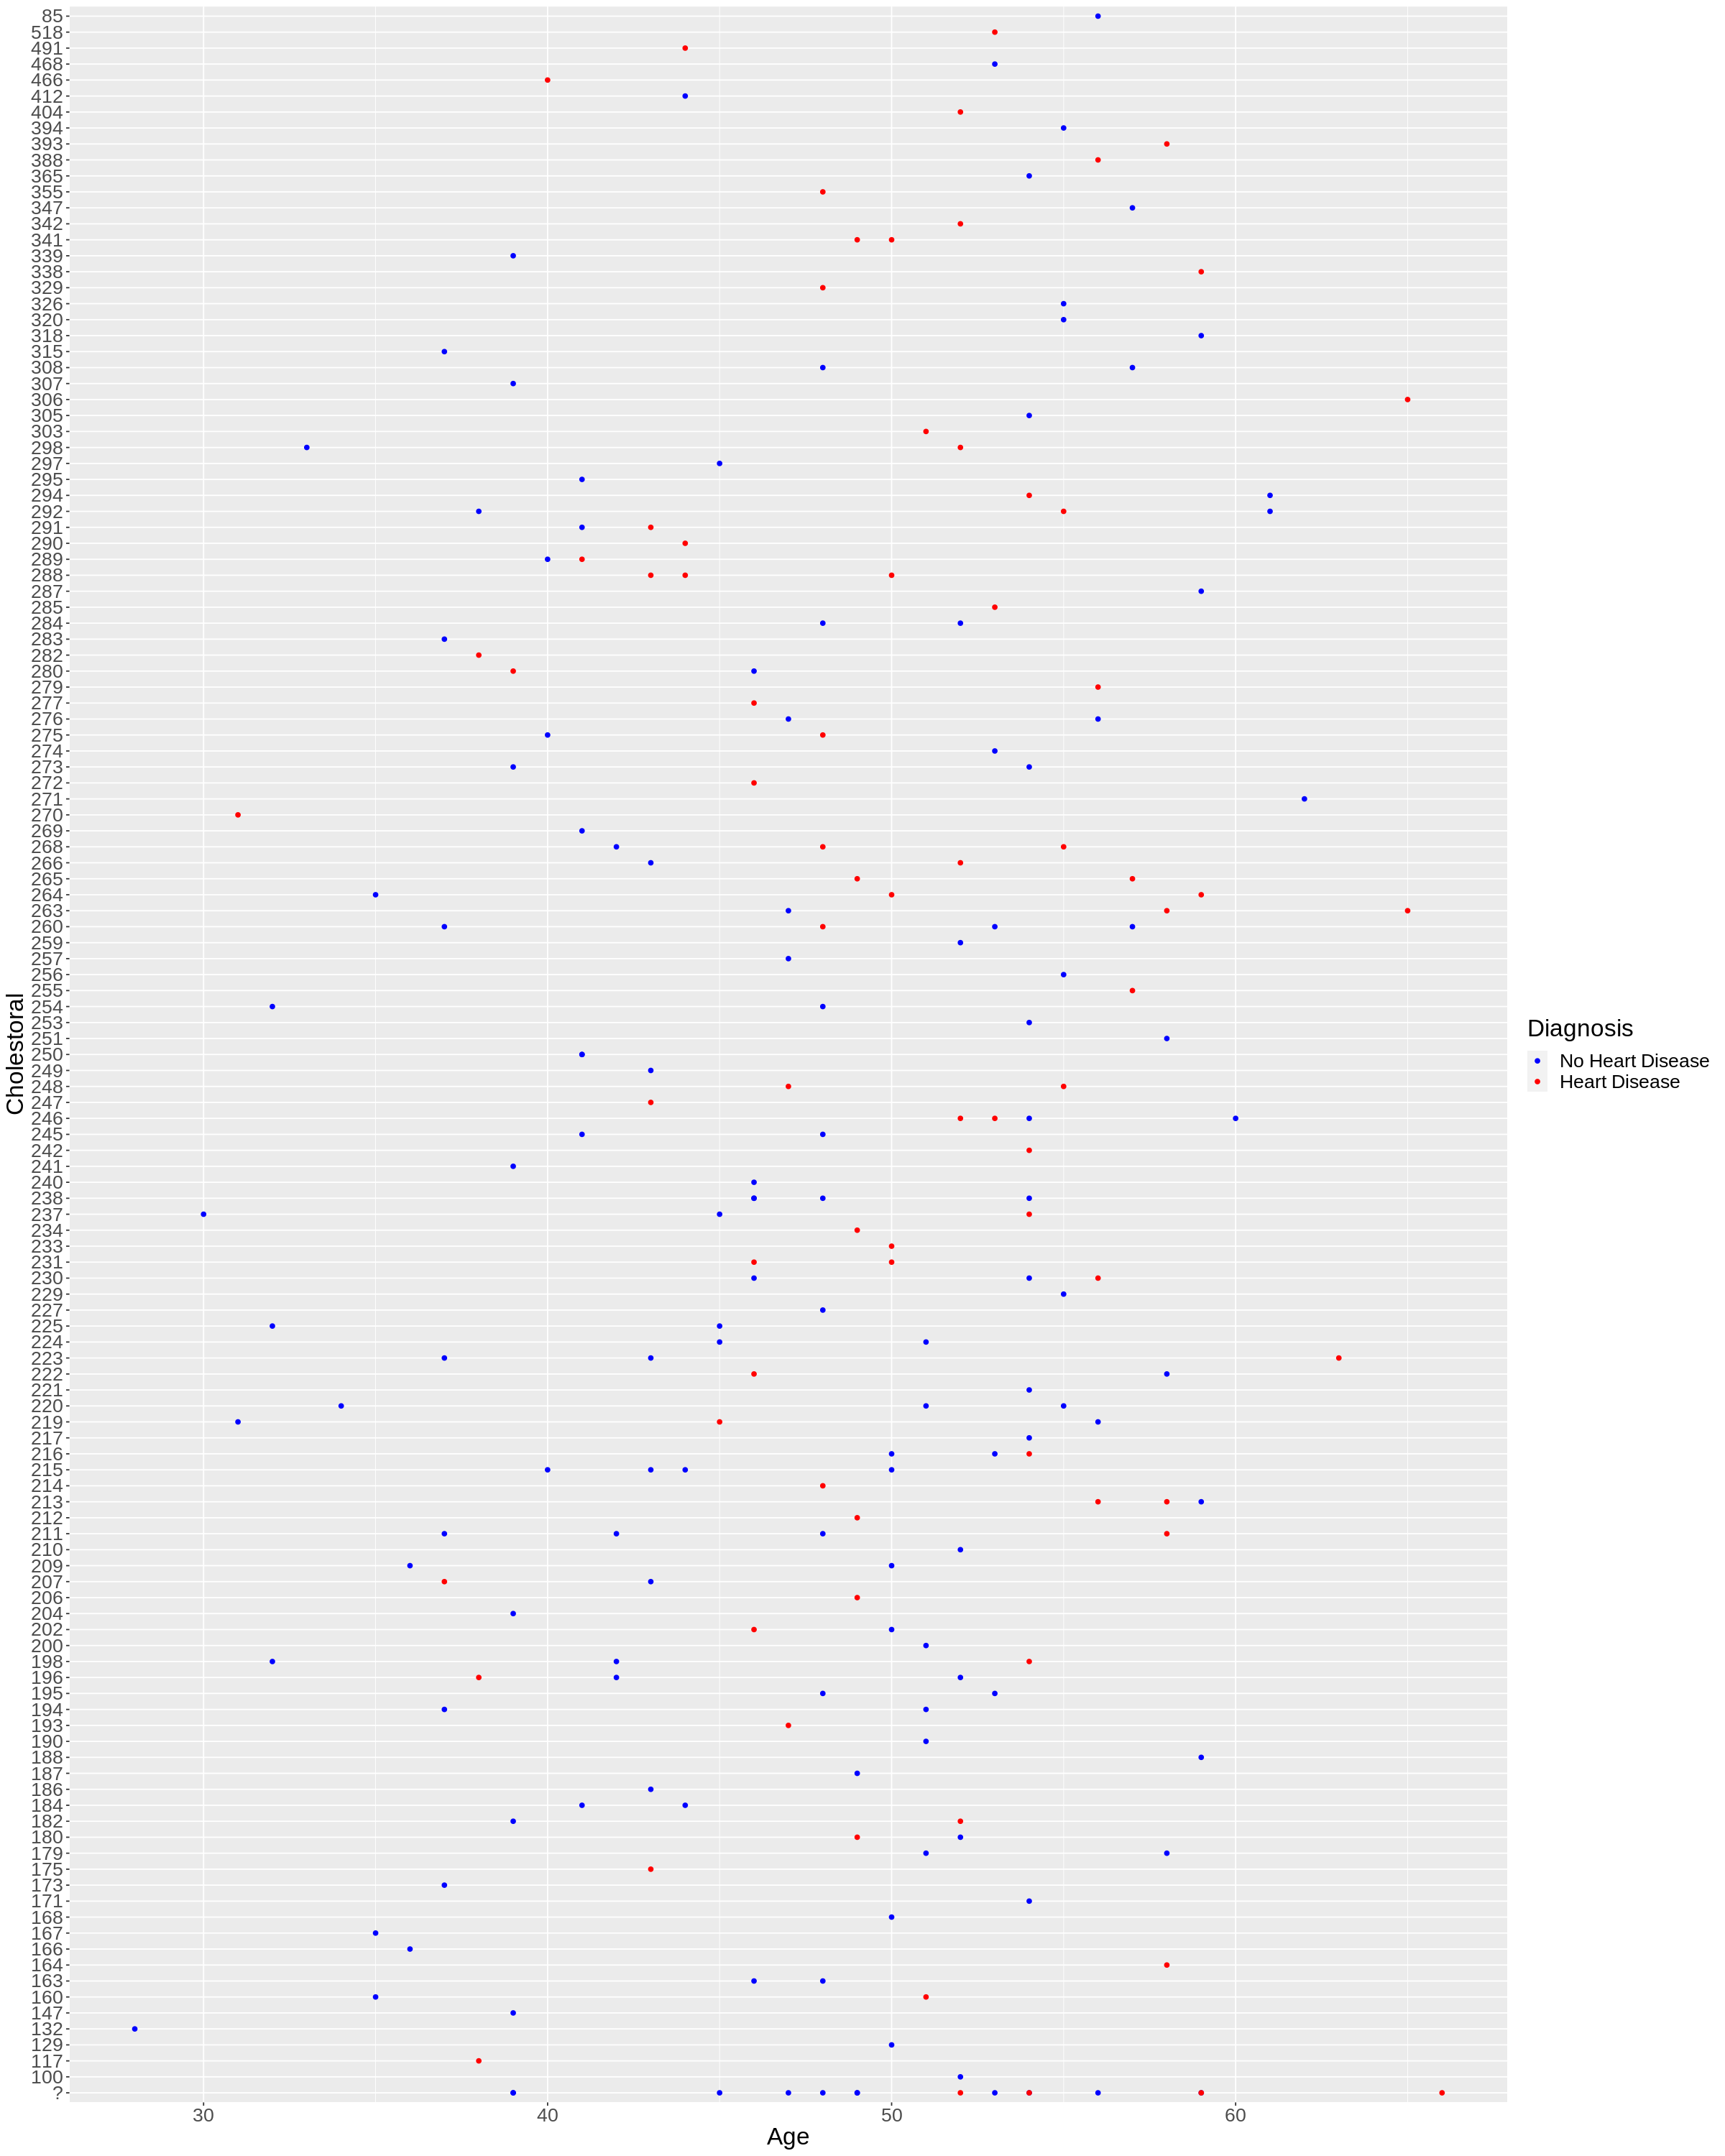

In [27]:
options(repr.plot.width = 20, repr.plot.height = 25)
heart_scatterplot_5 <- training_heart_data |>
    ggplot(aes(x = age, y = serum_cholestoral, color = as.factor(diagnosis))) +
    geom_point() +
    labs(x = "Age", y = "Cholestoral", color = "Diagnosis") +
    theme(text = element_text(size = 20)) +
    scale_color_manual(labels = c("No Heart Disease", "Heart Disease"), values = c("blue", "red"))
heart_scatterplot_5

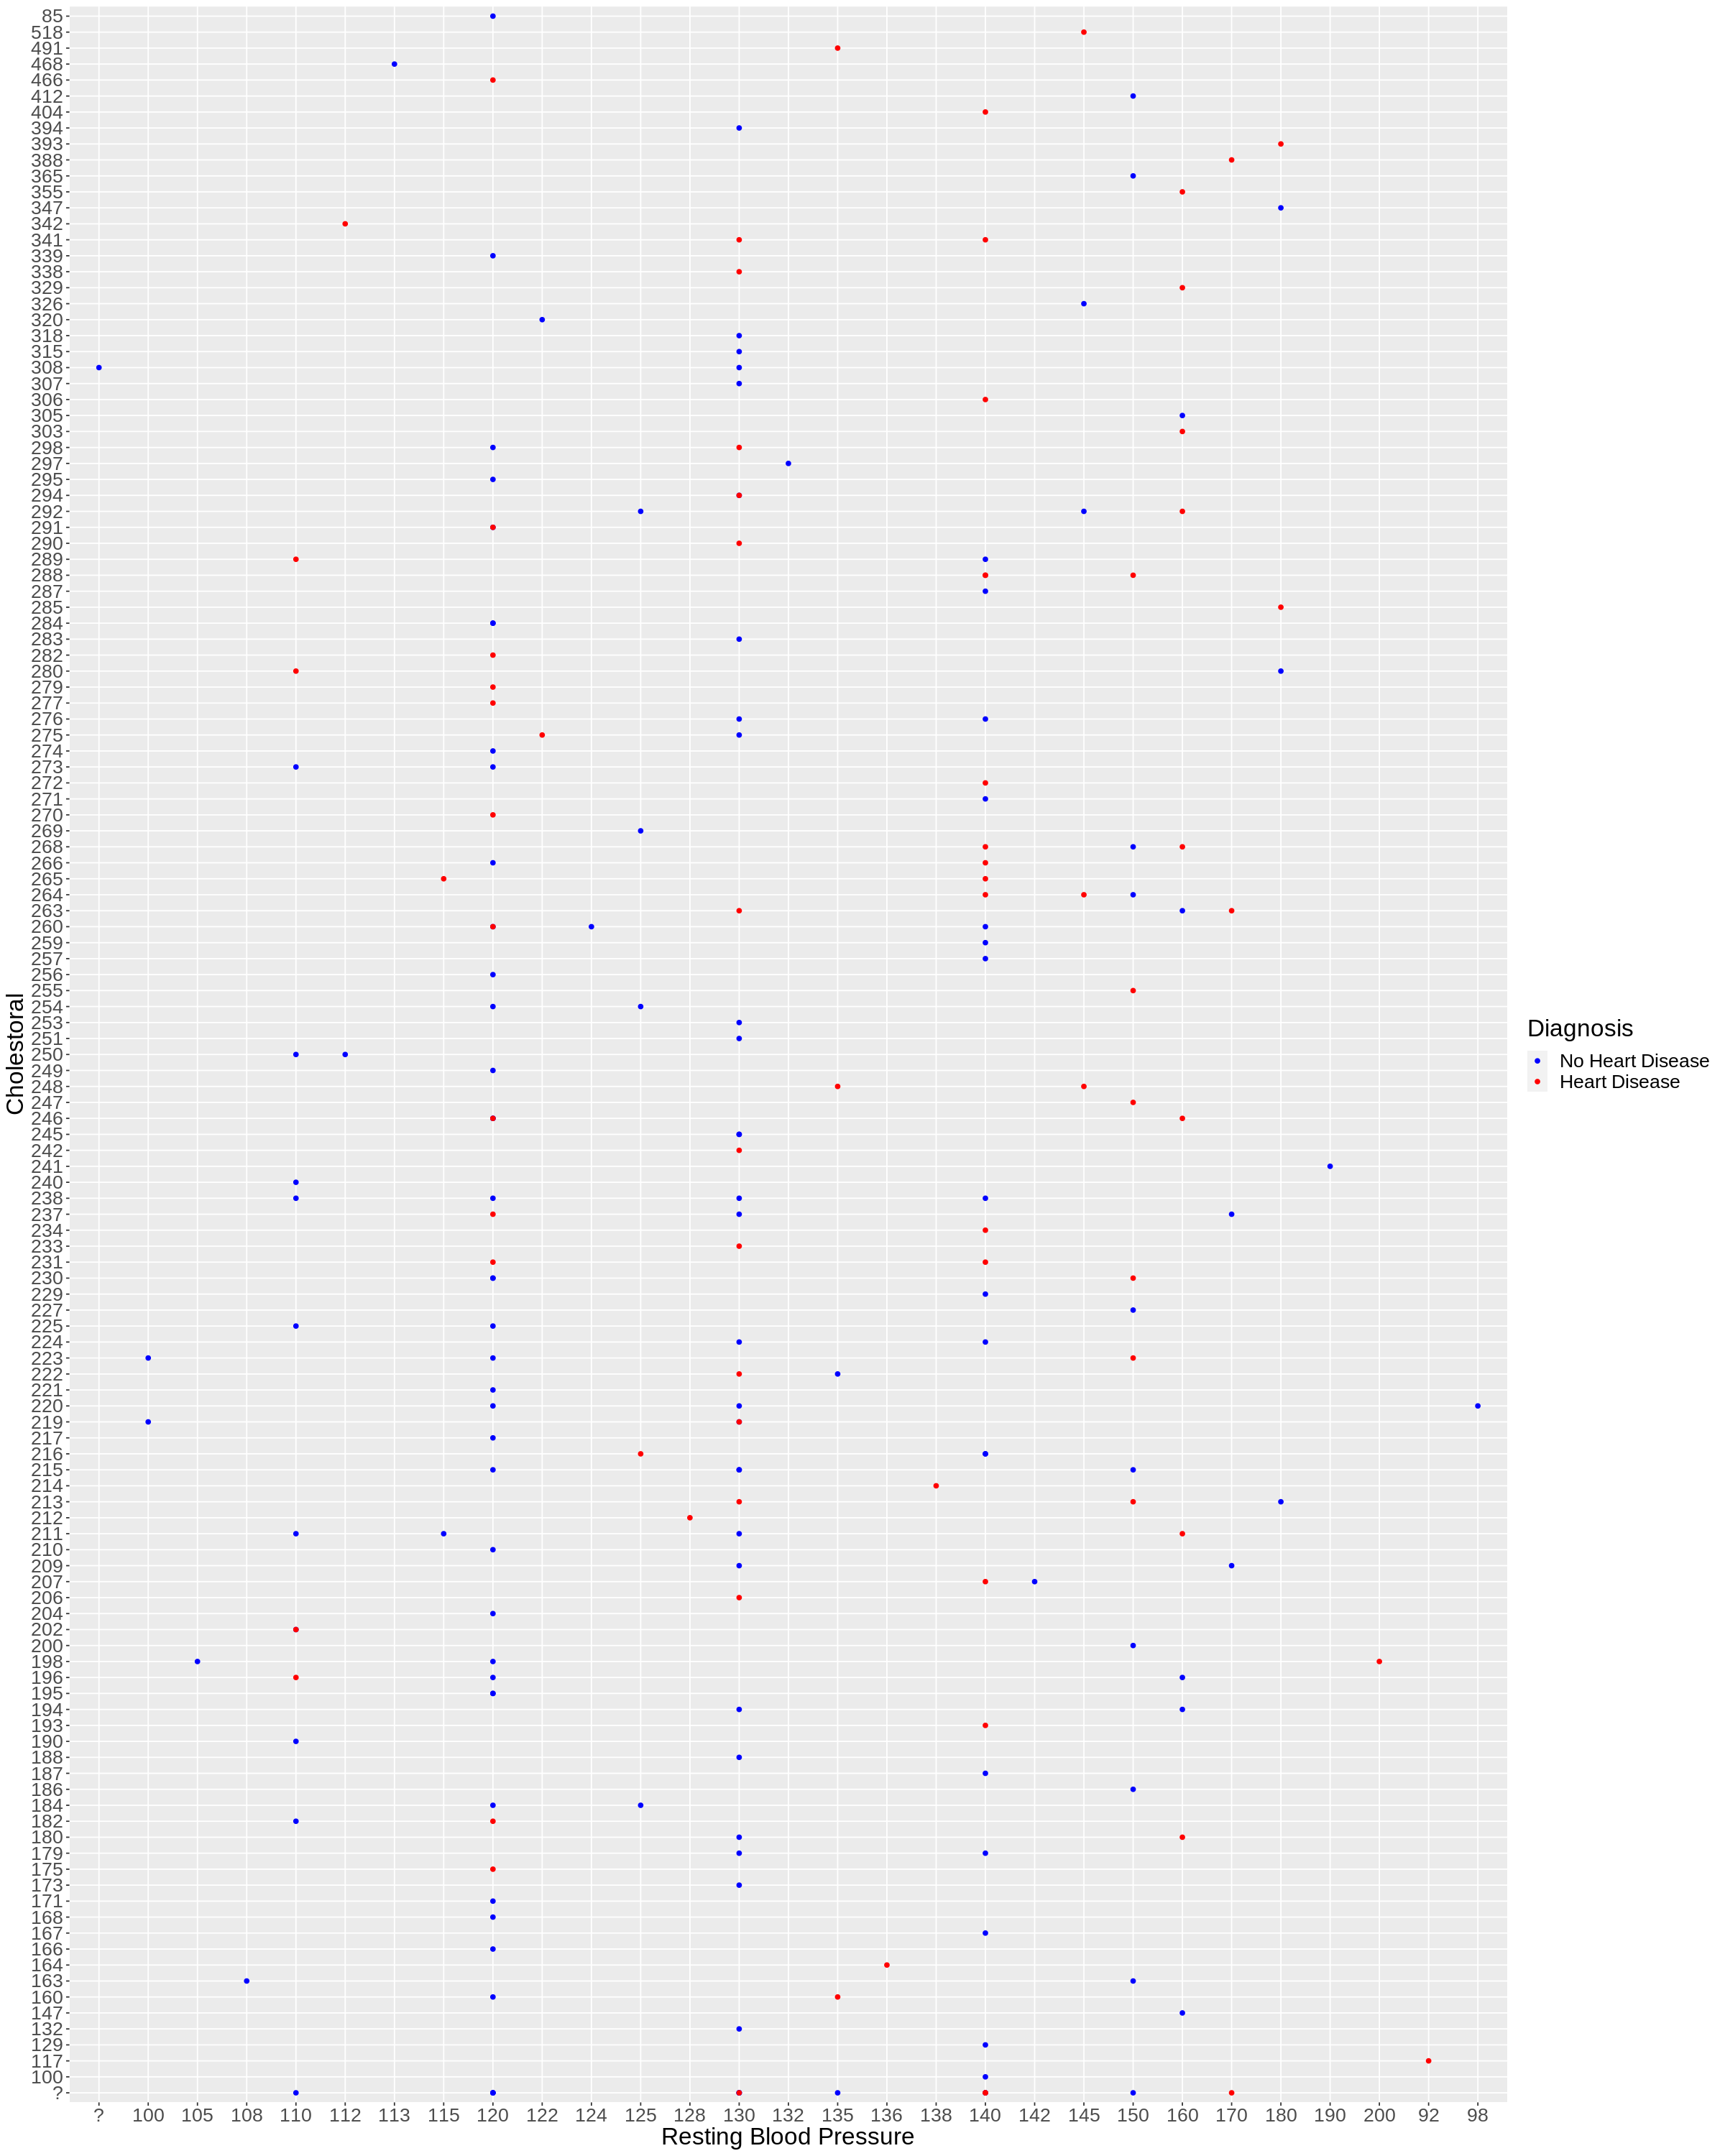

In [28]:
options(repr.plot.width = 20, repr.plot.height = 25)
heart_scatterplot_6 <- training_heart_data |>
    ggplot(aes(x = resting_blood_pressure, y = serum_cholestoral, color = as.factor(diagnosis))) +
    geom_point() +
    labs(x = "Resting Blood Pressure", y = "Cholestoral", color = "Diagnosis") +
    theme(text = element_text(size = 20)) +
    scale_color_manual(labels = c("No Heart Disease", "Heart Disease"), values = c("blue", "red"))
heart_scatterplot_6

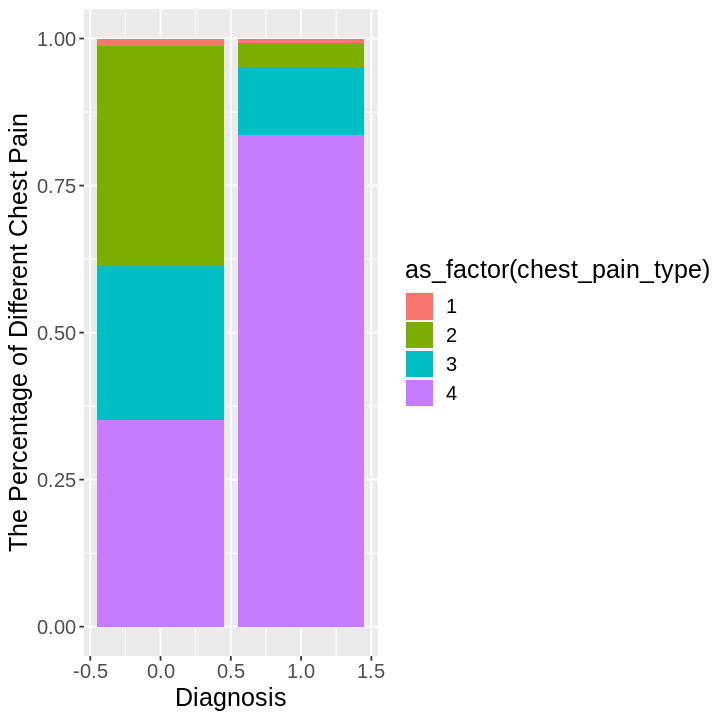

In [12]:
library(tidyverse)
options(repr.plot.width = 6, repr.plot.height = 6)
heart_plot1 <- ggplot(training_heart_data, aes(x = diagnosis, y = chest_pain_type, fill = as_factor(chest_pain_type))) + 
               geom_bar(stat = "identity", position = "fill") +
               labs(x = "Diagnosis", y = "The Percentage of Different Chest Pain") +
               theme(text = element_text(size = 15))
heart_plot1

#I think the plots looked weird because we have to plot two predictor variables, then colour them by the diagnosis instead
#we also probably need to choose predictor variables that have many values rather than just 0 or 1 


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


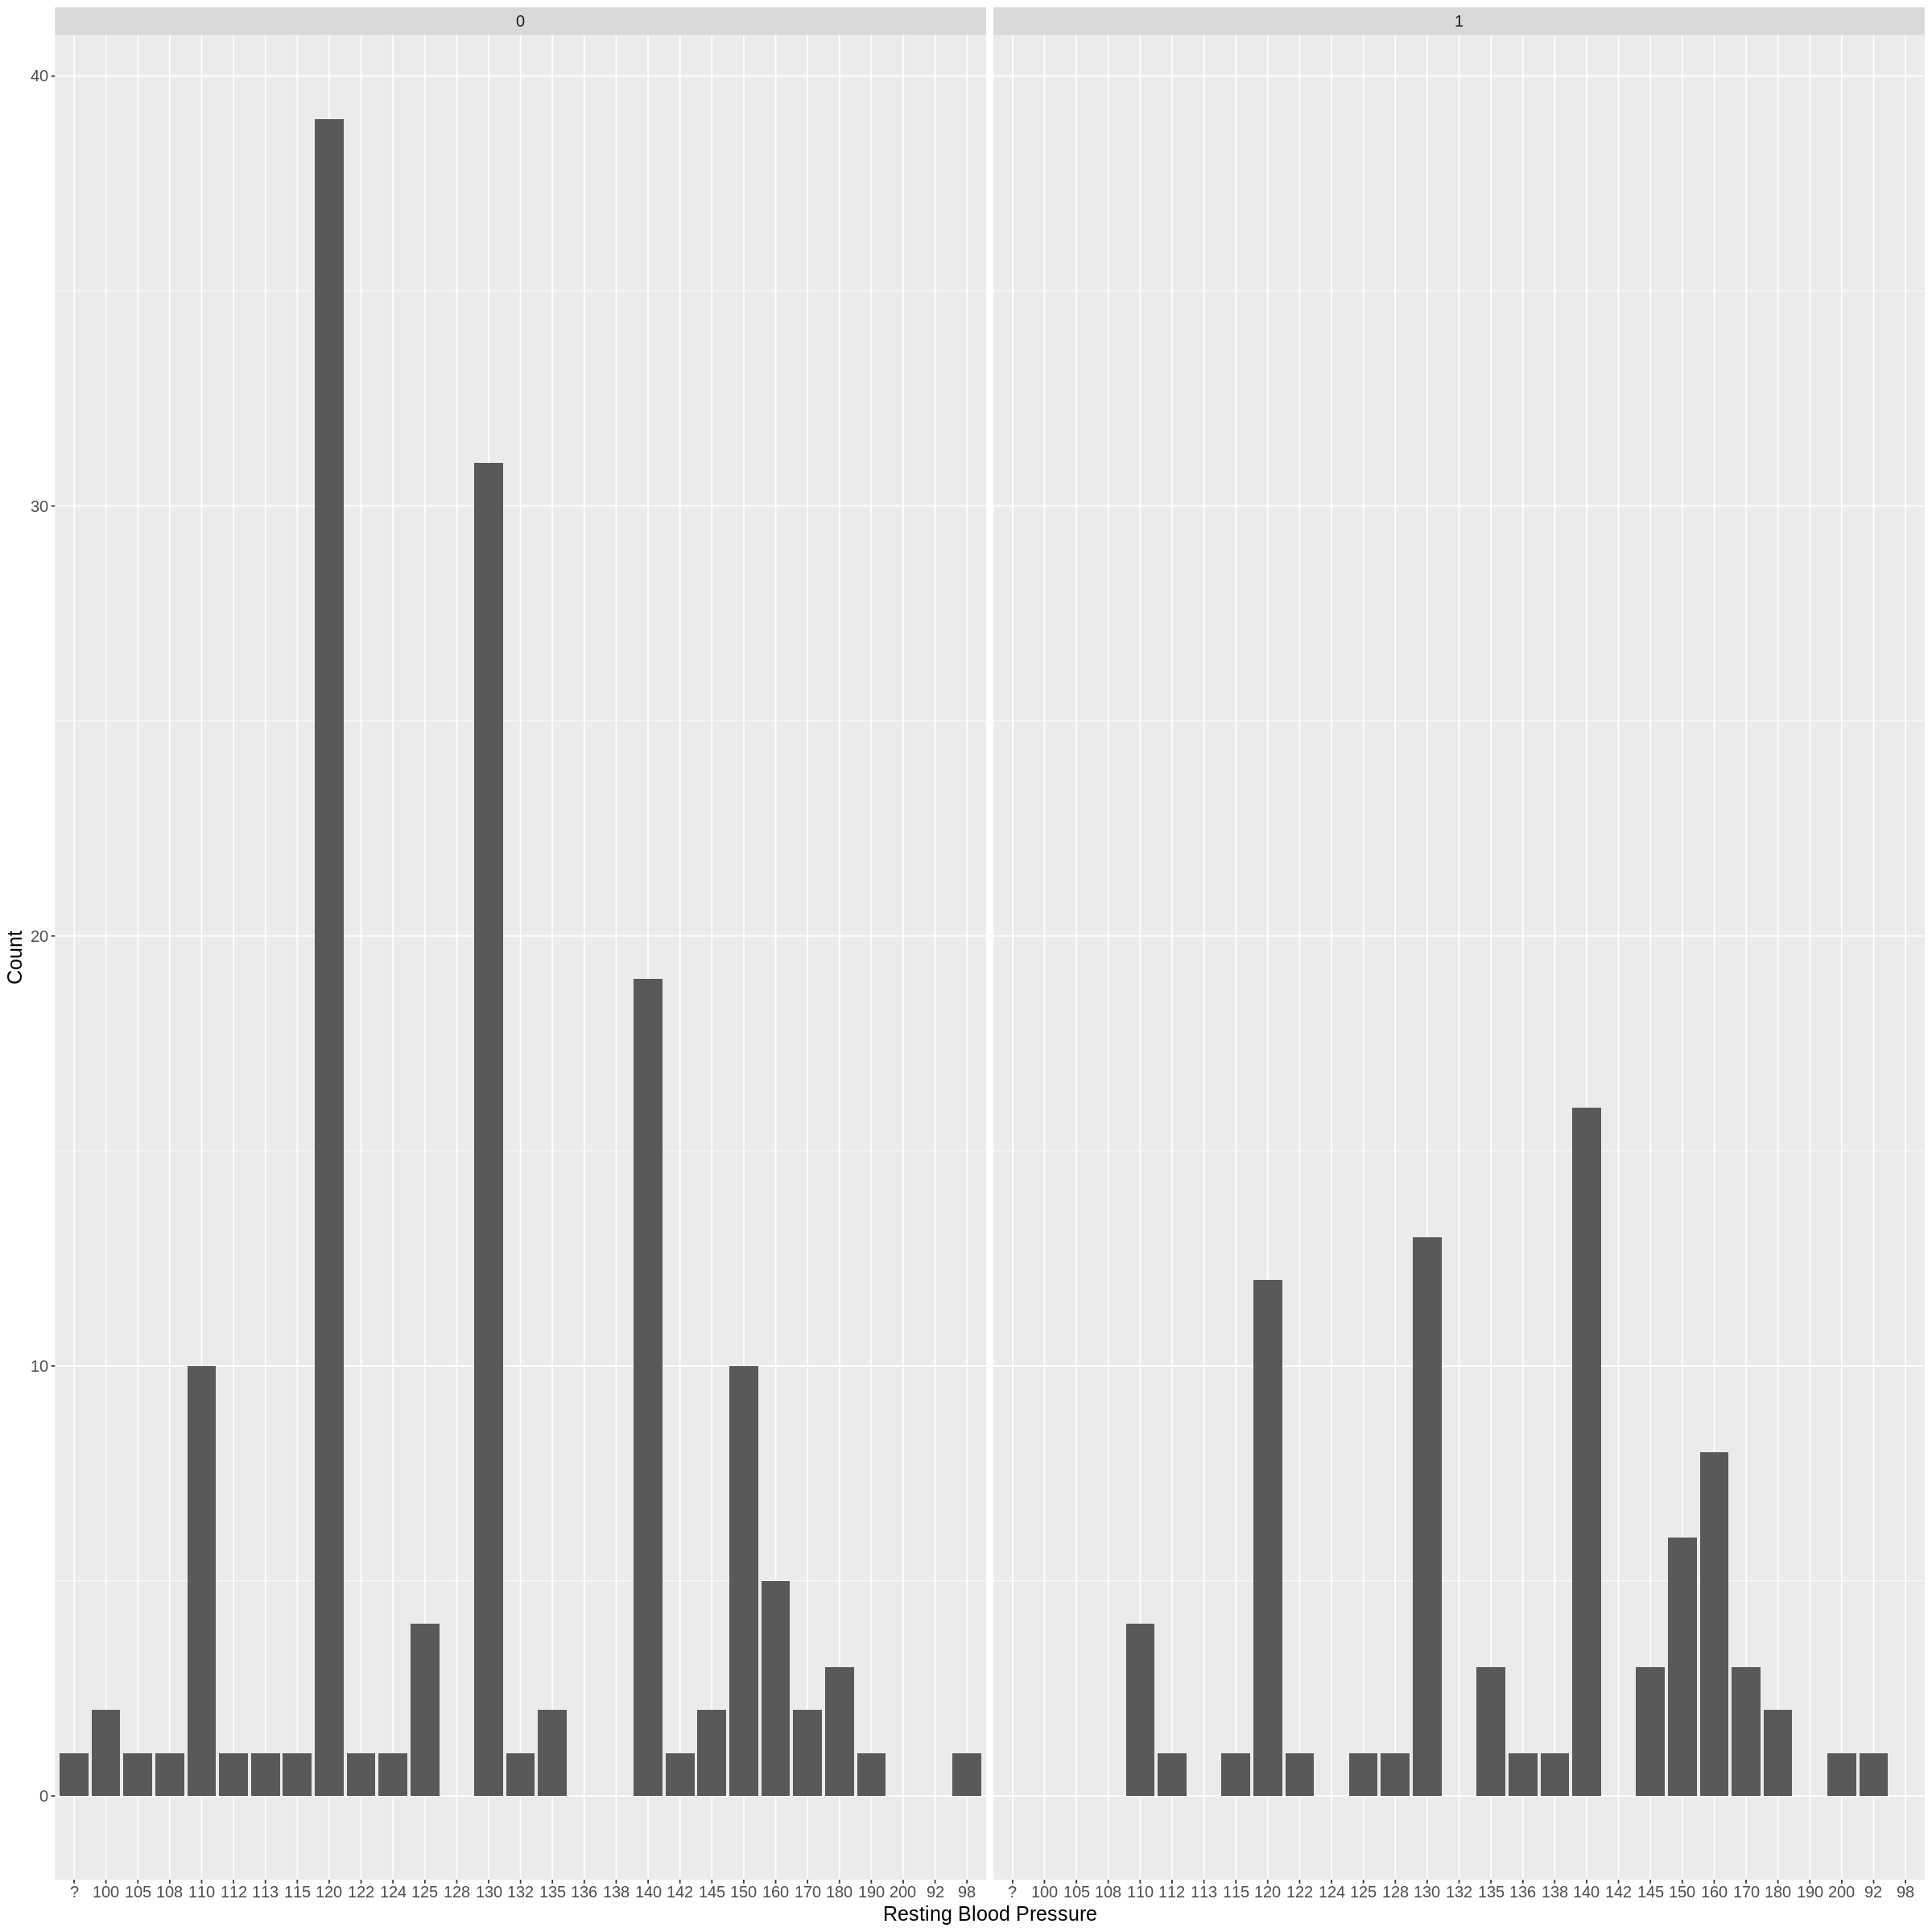

In [14]:
library(tidyverse)
options(repr.plot.width = 20, repr.plot.height = 20)

training_heart_data <- as_tibble(training_heart_data)
heart_plot2 <- ggplot(training_heart_data, aes(x = resting_blood_pressure)) +
               geom_histogram(stat="count") +
               labs(x = "Resting Blood Pressure", y = "Count") +
               theme(text = element_text(size = 15)) +
               facet_grid(cols = vars(diagnosis))

heart_plot2

METHODS

We will create our model by first scaling the predictor variables and then creating a recipe that can be used within the model workflow. Our classifier will be based on the following predictor variables: chest pain, blood pressure, resting electrocardiographic results... etc (need to state reasons why we chose those variables). 

*not sure if this is what we are supposed to talk about here....

OUTCOMES AND SIGNIFICANCE 

We expect our classifier to be able to predict whether individuals have heart disease depending on the variables that indicate heart disease within the training data. 

Future questions include whether we can create a classifier model that can predict the presence of a disease based on risk factors for another disease (correlation of two related diseases?). Further, we might ask whether other variables exist outside of the hungarian data set that might contribute to heart disease and improve the accuracy of the model we created. Or, how might we make these alrogithms more acessible in the health care industry or even for at home diagnosis. We might also ask how practitioners might be able to use classification algorithms such as ours to better treat patients with heart disease. Finally, we could ask which of these predictor variables are the most accurate in predicting heart disease on their own as this could indicate which symptoms are most important to look out for. 

This model is significant because it provides the opportunity to provide easier, faster and more accurate diagnosis without the need for diagnosis by a clinical practitioner? and can prevent life threats by predicting presence of heart disease based on risk factors like high blood pressure. Early diagnosis could potentially revolutionize health care for heart disease patients with risk factors by allowing for early treatment/care before the disease progresses to fatal levels. 